Jai shree ram

In [ ]:
!python3 -m pip install --upgrade sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.48
    Uninstalling SQLAlchemy-1.4.48:
      Successfully uninstalled SQLAlchemy-1.4.48


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandasql import sqldf
from sqlalchemy import text

In [106]:
df1=pd.read_csv('/content/drive/MyDrive/world-happiness-report-2021.csv')
df1

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


Display the data of top 5 east asian countries based on 'Generosity'

In [85]:
final_df = df1.sort_values(by=['Generosity'], ascending=False)
df_east_asia=final_df[ final_df ['Regional indicator']=='East Asia']
df_east_asia.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
69,Mongolia,East Asia,5.677,0.042,5.760,5.595,9.400,0.935,62.500,0.708,0.116,0.856,2.43,0.966,1.065,0.442,0.397,0.263,0.053,2.492
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
23,Taiwan Province of China,East Asia,6.584,0.038,6.659,6.510,10.871,0.898,69.600,0.784,-0.070,0.721,2.43,1.480,0.982,0.665,0.490,0.142,0.139,2.687
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
83,China,East Asia,5.339,0.029,5.397,5.281,9.673,0.811,69.593,0.904,-0.146,0.755,2.43,1.061,0.785,0.665,0.636,0.093,0.117,1.982


Build a plot (line plot) that shows the variation of 'Ladder score' among the above 5 east asian countries (based on generosity)

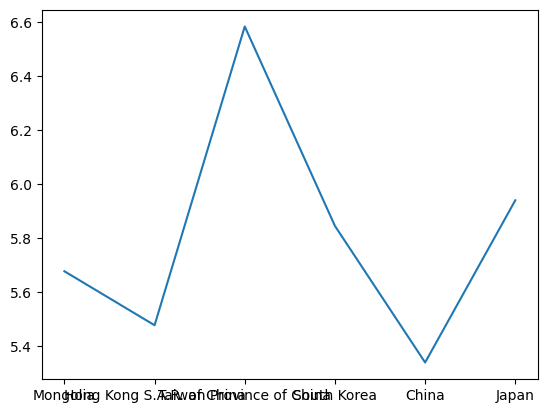

<Figure size 640x480 with 0 Axes>

In [99]:
score=[]
ct = 0;
for i in df_east_asia['Ladder score']:
  score.append(i)

plt.plot(df_east_asia['Country name'],score)
fig = plt.figure()
fig.subplots_adjust(bottom = 0.8)
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
plt.show()



Build a plot that shows the variation of 'Ladder score' among the 5 south east asian countries

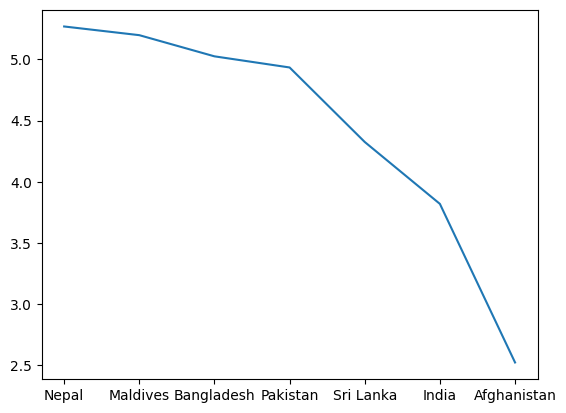

<Figure size 640x480 with 0 Axes>

In [114]:
df_south_asia=df1[ df1 ['Regional indicator']=='South Asia']
# df_south_asia.head()
score=[]
ct = 0;
for i in df_south_asia['Ladder score']:
  score.append(i)

plt.plot(df_south_asia['Country name'],score)
fig = plt.figure()
fig.subplots_adjust(bottom = 0.8)
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
plt.show()

Create a dataframe object : df_2021 with the following countries: 'China', 'Nepal', 'Bangladesh', 'Pakistan', 'Myanmar', 'India', 'Afghanistan'. Now, build a scatter plot to show the relation these countries vs their 'Logged GDP per capita'

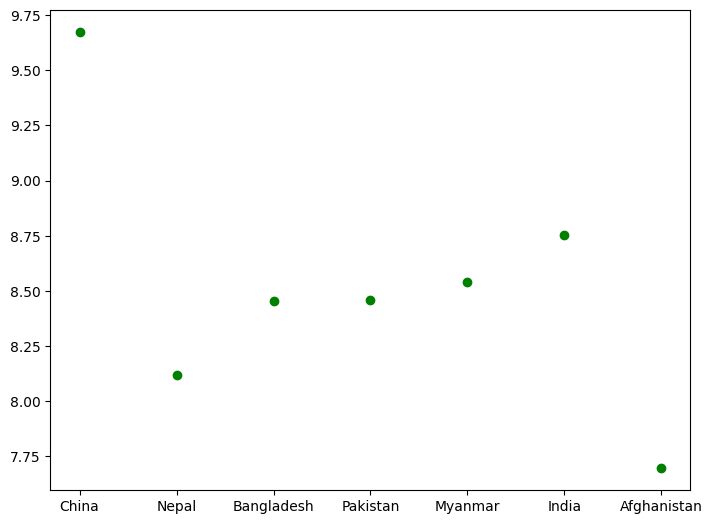

In [121]:
option=['China','Nepal','Bangladesh','Pakistan','Myanmar','India','Afghanistan']
df_2021=df1[ df1 ['Country name'].isin(option)]
# df_2021
score=[]
ct = 0;
for i in df_2021['Logged GDP per capita']:
  score.append(i)
fig2 = plt.figure()
ax=fig2.add_axes([0,0,1,1])
ax.scatter(df_2021['Country name'],score,color='g')
plt.show()
